In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Vecteur:
    def __init__(self, x, y, s):
        self.coord = np.array([x,y]).reshape(2,1)
        self.nom = s
        
    def __repr__(self):
        return 'Vecteur ' + self.nom + ' : [' + str(self.coord[0,0]) + ', '+ str(self.coord[1,0])+']'
    

In [3]:
v = Vecteur(3,5,'v')
v

Vecteur v : [3, 5]

In [4]:
print(v.coord, v.nom)

[[3]
 [5]] v


In [24]:
class Point(Vecteur):
    def __repr__(self):
        return 'Point ' + self.nom + ' : [' + str(self.coord[0,0]) + ', '+ str(self.coord[1,0])+']'
    
    def dessiner(self,u,v):
        x, y = self.coord[0], self.coord[1]
        dl = '$'
        plt.plot(x, y, 'bo', color='black', scalex=False,scaley=False)
        #plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),arrowprops=dict(facecolor='black', shrink=0.05))
        plt.annotate(dl +self.nom+dl, xy=(x,y), xytext=(x+u,y+v), fontsize=10)
    
    def milieu(self, B):
        if type(B)==Point:
            nom = '\mu('+self.nom+', '+B.nom+')'
            return Point((self.coord[0]+B.coord[0])/2, (self.coord[1]+B.coord[1])/2, nom)
    
    def vecteur(self, B):
        if type(B)==Point:
            x = B.coord[0]-self.coord[0]
            y = B.coord[1]-self.coord[1]
            nom = '\overrightarrow{}'+self.nom+B.nom+'}'
            return Vecteur(x, y ,nom)

In [188]:
A = Point(1,3,'A')
B = Point(2,-4,'B')
I = A.milieu(B)
v = A.vecteur(B)
A, B, I, v

(Point A : [1, 3],
 Point B : [2, -4],
 Point \mu(A, B) : [1.5, -0.5],
 Vecteur \overrightarrow{}AB} : [1, -7])

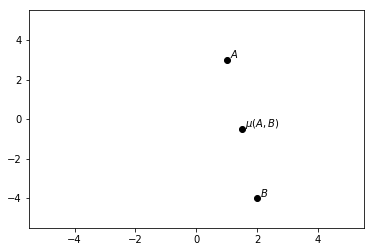

In [189]:
h = 0.1
fig, ax = plt.subplots()
plt.plot(-5,-5)
plt.plot(5,5)
A.dessiner(h, h)
B.dessiner(h, h)
I.dessiner(h, h)

plt.show()

In [30]:
class Polygone:
    def __init__(self, L):
        self.points = L
        self.cotes = len(L)-1
    
    def __repr__(self):
        return 'Polygone '+ self.points[0].nom + '... ' + self.points[-1].nom
    
    def dessiner(self):
        X = [p.coord[0] for p in self.points]
        Y = [p.coord[1] for p in self.points]
        plt.plot(X,Y, color='black', linewidth=2)
        
    def dessinerDetails(self, u,v):
        self.dessiner()
        for p in self.points:
            p.dessiner(u,v)

In [153]:
phi = np.pi*2/5
n = 5
h = 0.05
noms = ['A','B','C','D','E','F']
L = [Point(np.cos(k*phi), np.sin(k*phi),noms[k]) for k in range(n+1)]
L

[Point A : [1.0, 0.0],
 Point B : [0.30901699437494745, 0.9510565162951535],
 Point C : [-0.8090169943749473, 0.5877852522924732],
 Point D : [-0.8090169943749476, -0.587785252292473],
 Point E : [0.30901699437494723, -0.9510565162951536],
 Point F : [1.0, -2.4492935982947064e-16]]

In [154]:
poly = Polygone(L)

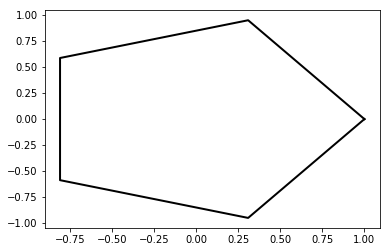

In [155]:
poly.dessiner()
plt.show()

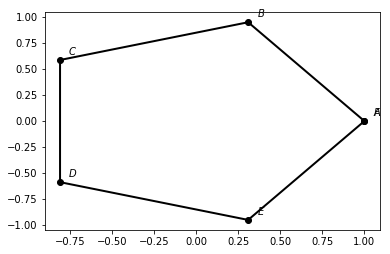

In [156]:
poly.dessinerDetails(h, h)
plt.show()

In [157]:
class TransformationAffine:
    def __init__(self, M, B):  # M matrice, B vecteur constant T(x) = M*x + B
        if type(M)==np.matrix and type(B)==Vecteur:
            self.matrice = M
            self.constante = B
            self.nom = '\\tau_{v}'
            print(self.matrice,self.constante)
    def image(self,p):
        if type(p)==Point:
            Y = np.dot(self.matrice, p.coord) + self.constante.coord
            return Point(Y[0], Y[1], self.nom + '(' + p.nom +')')
        elif type(p) == Polygone:
            return Polygone([self.image(s) for s in p.points])

In [158]:
I = np.identity(2)
type(I)
np.matrix(I)
type(np.matrix(I))

numpy.matrix

In [159]:
T = TransformationAffine(np.matrix(np.identity(2)), Vecteur(3,-4,'v'))
T.matrice

[[1. 0.]
 [0. 1.]] Vecteur v : [3, -4]


matrix([[1., 0.],
        [0., 1.]])

In [160]:
A, T.image(A)

(Point A : [1, 3], Point \tau_{v}(A) : [4.0, -1.0])

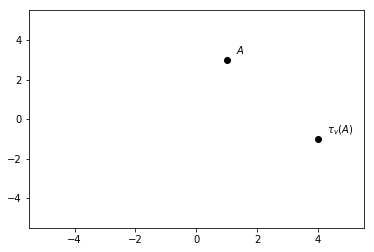

In [191]:
h = 0.3
fig, ax = plt.subplots()
plt.plot(-5,-5)
plt.plot(5,5)
A.dessiner(h, h)
T.image(A).dessiner(h, h)
plt.show()

In [170]:
class Translation(TransformationAffine):
    def __init__(self, v):
        self.matrice = np.identity(2)
        self.constante = v
        self.nom = '\\tau_{'+v.nom+'}'
    
    def __repr__(self):
        return 'Translation '+ self.nom + str(self.constante)

In [171]:
t = Translation(Vecteur(-2,-3,'u'))
t

Translation \tau_{u}Vecteur u : [-2, -3]

In [172]:
t.image(A)

Point \tau_{u}(A) : [-1.0, 0.0]

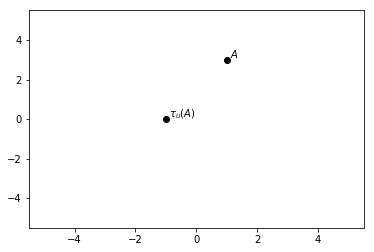

In [186]:
# translation point
fig, ax = plt.subplots()
plt.plot(-5,-5)
plt.plot(5,5)
A.dessiner(h, h)
t.image(A).dessiner(h, h)
plt.show()

In [174]:
t.image(poly)

Polygone \tau_{u}(A)... \tau_{u}(F)

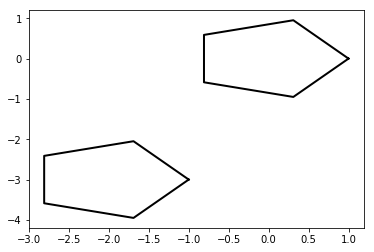

In [175]:
# translation polygone
#g = 4
fig, ax = plt.subplots()
#plt.plot(-g,-g)
#plt.plot(g/2,g/2)
poly.dessiner()
t.image(poly).dessiner()
plt.show()

In [176]:
class Rotation(TransformationAffine):
    def __init__(self, Centre, theta, nom):
        self.nom = nom
        self.centre = Centre
        self.angle = theta
        # rotation
        c, s = np.cos(theta), np.sin(theta)
        self.matrice = np.matrix([[c, -s],[s, c]])
        # translation
        b2 = self.centre.coord - np.dot(self.matrice, self.centre.coord)
        self.constante = Vecteur(b2[0,0], b2[1,0],'')
        
    def __repr__(self):
        return 'Rotation (Centre : '+ str(self.centre) + ' , Angle : ' + str(self.angle) +')'

In [177]:
O = Point(0,0,'O')
r = Rotation(O,-np.pi/3,'r_1')
r

Rotation (Centre : Point O : [0, 0] , Angle : -1.0471975511965976)

In [178]:
r1Poly = r.image(poly)
r1Poly

Polygone r_1(A)... r_1(F)

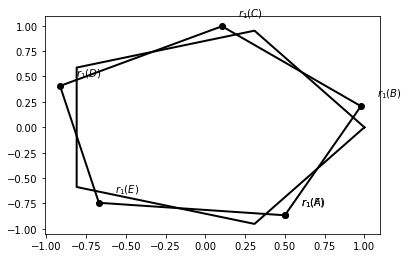

In [179]:
# rotation polygone
#g = 4
h = 0.1
fig, ax = plt.subplots()
#plt.plot(-g,-g)
#plt.plot(g/2,g/2)
poly.dessiner()
r1Poly.dessinerDetails(h,h)
plt.show()

In [180]:
W = Point(-3,0,'W')
r2 = Rotation(W,-np.pi/2,'r_2')
r2

Rotation (Centre : Point W : [-3, 0] , Angle : -1.5707963267948966)

In [181]:
r2Poly = r2.image(poly)
r2Poly

Polygone r_2(A)... r_2(F)

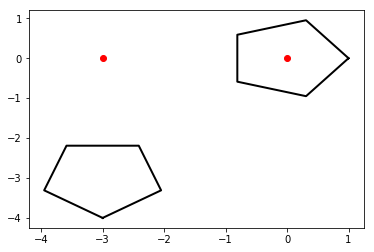

In [187]:
# rotation polygone
#g = 1
fig, ax = plt.subplots()
#plt.plot(-g,-g)
#plt.plot(g,g)
plt.plot(0,0,'ro')
plt.plot(-3,0,'ro')
poly.dessiner()
r2Poly.dessiner()
plt.show()

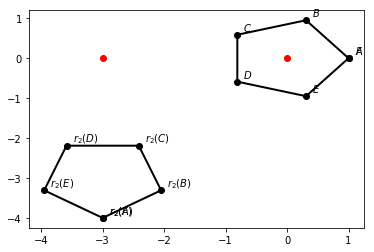

In [183]:
# rotation polygone
#g = 1
fig, ax = plt.subplots()
#plt.plot(-g,-g)
#plt.plot(g,g)
plt.plot(0,0,'ro')
plt.plot(-3,0,'ro')
poly.dessinerDetails(h, h)
r2Poly.dessinerDetails(h, h)
plt.show()